 PROBLEM STATEMENT:
Clustering of the iris dataset

Objective
1. Perform clustering of the iris dataset based on all variables using Gaussian mixture models.

2. Use PCA to visualize clusters.

Mahesh Dhanraj Paliwal(32447)

Importing Files and Datasets

In [12]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

In [3]:
iris_data = pd.read_csv("Iris.csv",index_col='Id')
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [4]:
sc=StandardScaler()
iris_data.iloc[:,1:-1]=sc.fit_transform(iris_data.iloc[:,1:-1])

In [8]:
pca=PCA(n_components=2)
x_new=pca.fit_transform(iris_data.drop(['Species'],axis=1))
x_new

array([[-2.22769886, -0.40900398],
       [-1.96360467,  0.73024835],
       [-2.22557991,  0.37599025],
       [-2.12986479,  0.61513109],
       [-2.34143551, -0.58849212],
       [-2.11888909, -1.41847305],
       [-2.29720779, -0.04002389],
       [-2.1664857 , -0.16514497],
       [-2.11094433,  1.11700362],
       [-2.07715738,  0.5292727 ],
       [-2.20310661, -0.94542103],
       [-2.21900919, -0.1007741 ],
       [-2.08494812,  0.78256805],
       [-2.40601756,  0.96944518],
       [-2.34323337, -1.71154258],
       [-2.40847447, -2.58283356],
       [-2.2568969 , -1.39960036],
       [-2.14986813, -0.42677916],
       [-1.99595775, -1.29029878],
       [-2.32603795, -1.0735953 ],
       [-1.92343093, -0.3127594 ],
       [-2.17798329, -0.87733782],
       [-2.65349418, -0.43144134],
       [-1.75025295, -0.04841871],
       [-2.11550333, -0.11492862],
       [-1.85108805,  0.68626749],
       [-1.97632228, -0.2054135 ],
       [-2.14968419, -0.44826667],
       [-2.11396222,

In [9]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
per_var

array([72.4, 23.8])

In [10]:
PCA_data=pd.DataFrame(x_new,columns=['PC1','PC2'])
PCA_data

,PC1,PC2
0,-2.227699,-0.409004
1,-1.963605,0.730248
2,-2.225580,0.375990
3,-2.129865,0.615131
4,-2.341436,-0.588492
...,...,...
145,1.765144,-0.444122
146,1.561886,0.844756
147,1.444626,-0.321708
148,1.335688,-1.136967


Text(0, 0.5, 'PC2 - 23.8%')

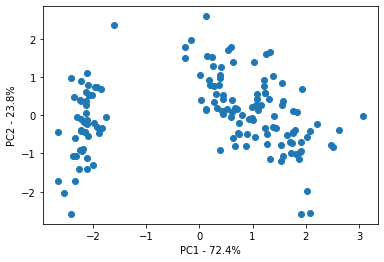

In [11]:
plt.scatter(PCA_data.PC1,PCA_data.PC2)
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

In [13]:

gmm = GaussianMixture(n_components=3)
gmm.fit(PCA_data)

#predictions from gmm
labels = gmm.predict(PCA_data)
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [14]:
PCA_data['ClusterGMM'] = labels

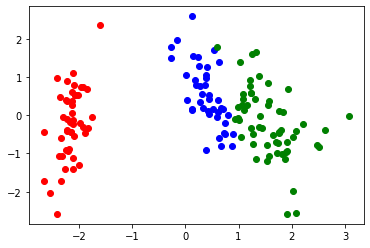

In [15]:
color=['blue','green','red']
for k in range(0,3):
    data = PCA_data[PCA_data['ClusterGMM']==k]
    plt.scatter(data['PC1'],data['PC2'],c=color[k])

In [16]:
PCA_data

,PC1,PC2,ClusterGMM
0,-2.227699,-0.409004,2
1,-1.963605,0.730248,2
2,-2.225580,0.375990,2
3,-2.129865,0.615131,2
4,-2.341436,-0.588492,2
...,...,...,...
145,1.765144,-0.444122,1
146,1.561886,0.844756,1
147,1.444626,-0.321708,1
148,1.335688,-1.136967,1


Conclusion:
using PCA dimentionality reduction and Gaussian Mixture Clustering Model we classified 3 clusters as Iris-setosaRed(Red), Iris-virginica(green), Iris-versicolor(Blue) in the dataset and plot the grapgh with different colours